In [93]:
import numpy as np
from scipy.spatial import ConvexHull,Delaunay
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Suppose a simple net architecture 2 5 1
with relu activation : 2 5 (relu) 1 (relu)

In [94]:
W1 = np.array([[-1,3,1,2,3],[1,0,-2,1,-3]]).T

In [95]:
b1 = np.array([2,-1,2,0,-2]).reshape(5,1)

In [96]:
W2= np.array([-3,2,1,-2,-1]).reshape(1,-1)

In [97]:
b2 = np.array([0])

In [98]:
def decompose(w):
    return (w+abs(w))/2,(-w+abs(w))/2
def G1(x):
    return decompose(W1)[1].dot(x)
def H1(x):
    return decompose(W1)[0].dot(x)+b1
def F1(x):
    return np.maximum(G1(x),H1(x))
def NU1(x):
    return F1(x)-G(x)

In [99]:
PG1 = np.concatenate((decompose(W1)[1],0*b1.reshape(-1,1)),axis=1)
PH1 = np.concatenate((decompose(W1)[0],b1.reshape(-1,1)),axis=1)
PF1 = np.stack((PG1,PH1),axis=1)

In [100]:
H2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PF1[i]= PF1[i] * decompose(W2)[1][0][i]
H2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PG1[i]= PG1[i] * decompose(W2)[0][0][i]
G2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PF1[i]= PF1[i] * decompose(W2)[0][0][i]
G2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PG1[i]= PG1[i] * decompose(W2)[1][0][i]

In [101]:
H2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        H2.append(PF1[i] * decompose(W2)[1][0][i])
        print('f',i+1,decompose(W2)[1][0][i])
    else:
        H2.append(PG1[i] * decompose(W2)[0][0][i])
        print('g',i+1,decompose(W2)[0][0][i])

f 1 3.0
g 2 2.0
g 3 1.0
f 4 2.0
f 5 1.0


In [102]:
G2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        G2.append(PG1[i] * decompose(W2)[1][0][i])
        print('g',i+1,decompose(W2)[1][0][i])
    else:
        G2.append(PF1[i] * decompose(W2)[0][0][i])
        print('f',i+1,decompose(W2)[0][0][i])

g 1 3.0
f 2 2.0
f 3 1.0
g 4 2.0
g 5 1.0


In [103]:
def Mink(l):
    a = sep(l[0])
    liste = l[1:]
    t = len(a)
    for i in liste:
        print(t,'t')
        if len(i.shape) == 1:
            print('loop 1')
            p=[]
            for j in a:
                p.append(j+i)
                
            a = p[:]    
        else:
            print('loop 2')
            p = []
            t = t*i.shape[0]
            for k in range(i.shape[0]):
                for j in a:
                    p.append(j+i[k])
            
            a = p[:] 
        
    print(len(a),t)
                
    return a
            


In [104]:
def clean(l):
    a=[]
    for i in l:
        if np.count_nonzero(i)>0:
            a.append(i)
            
    return a
            


In [129]:
def sep(el):
    a=[]
    if len(el.shape)==1:
        return [el]
    else :
        for k in range(el.shape[0]):
            a.append(el[k])
        return a

In [128]:
F2 = Mink(clean(H2))+ Mink(clean(G2))

2 t
loop 1
2 t
loop 2
4 t
loop 2
8 8
1 t
loop 2
2 t
loop 2
4 t
loop 1
4 4


In [107]:
tupled_lst = set(map(tuple, F2))
lst = map(list, tupled_lst)
FF = list(set(map(tuple, F2)))
f3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    f3[i,0]=FF[i][0]
    f3[i,1]=FF[i][1]
    f3[i,2]=FF[i][2]
f3,f3.shape

(array([[ 6.,  2., -2.],
        [ 3.,  5.,  4.],
        [ 3.,  5.,  0.],
        [10.,  4., -2.],
        [ 7.,  7.,  4.],
        [ 4.,  3.,  2.],
        [ 9.,  5., -2.],
        [10.,  3.,  0.],
        [ 0.,  8.,  6.],
        [ 7.,  7.,  0.],
        [ 4., 10.,  6.]]), (11, 3))

In [108]:
hull = ConvexHull(f3)

In [127]:
p2 = f3[list(hull.vertices)]

In [111]:
p = np.array([[ 4.,  7.,  0.],
       [ 6.,  5., -0.],
       [ 1.,  3.,  0.],])

t = np.array([[ 4.,  7.,  1.],
       [ 6.,  5., 1.],
       [ 1.,  3.,  1.]])

In [113]:
def hyp(simplices,points):
    
    e = [ppp(f3,i)*1 for i in range(simplices.shape[0])]
    c=0
    for s in simplices:
        p = list(s)
        p.append(s[0])
        #if a[c]==0:
        #if d[c]==1:
        if e[c]==1:
            for k in range(3):
                x=[points[p[k]][0],points[p[k+1]][0]]
                y=[points[p[k]][1],points[p[k+1]][1]]
                plt.plot(x,y,marker = 'o')
        c+=1
    plt.show()
        

In [114]:
def ppp(f,i):
    l = np.zeros((f.shape[0]+1,f.shape[1]))
    a = ConvexHull(f)
    b = f[a.simplices[i]]
    c = np.mean(b,axis=0)
    d = np.cross(b[1]-b[0],b[2]-b[0])
    
    for k in range(f.shape[0]):
        l[k]=f[k]
    l[-1]=c + 0.001*d
    
    e = ConvexHull(l)
    g = f.shape[0] in list(e.vertices)
    gg = d[2]>0
    
    if gg * g ==1 or gg+g == 0:
        return True
    return False

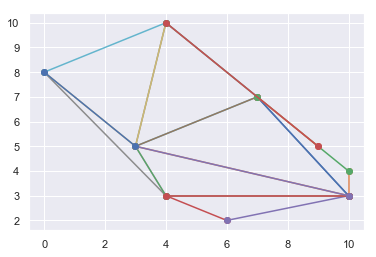

In [115]:
hyp(hull.simplices,f3)

In [116]:
hull.simplices.shape

(18, 3)

In [117]:
FF = list(set(map(tuple,  Mink(clean(G2)))))
g3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    g3[i,0]=FF[i][0]
    g3[i,1]=FF[i][1]
    g3[i,2]=FF[i][2]
g3,g3.shape

1 t
loop 2
2 t
loop 2
4 t
loop 1
4 4


(array([[10.,  3.,  0.],
        [ 9.,  5., -2.],
        [ 4.,  3.,  2.],
        [ 3.,  5.,  0.]]), (4, 3))

In [118]:
FF = list(set(map(tuple,  Mink(clean(H2)))))
h3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    h3[i,0]=FF[i][0]
    h3[i,1]=FF[i][1]
    h3[i,2]=FF[i][2]
h3,h3.shape

2 t
loop 1
2 t
loop 2
4 t
loop 2
8 8


(array([[ 6.,  2., -2.],
        [ 3.,  5.,  4.],
        [ 3.,  5.,  0.],
        [10.,  4., -2.],
        [ 7.,  7.,  4.],
        [ 0.,  8.,  6.],
        [ 7.,  7.,  0.],
        [ 4., 10.,  6.]]), (8, 3))

In [119]:
h3h = ConvexHull(h3)

In [122]:
import mpl_toolkits.mplot3d as a3

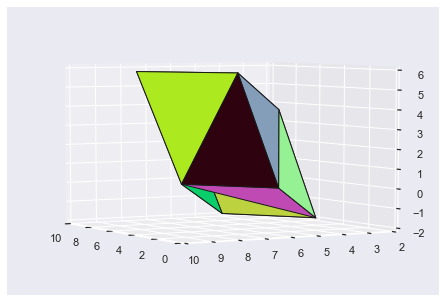

In [123]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(h3,axis=0)
max_=np.max(h3,axis=0)
ax = a3.Axes3D(pl.figure())
for s in h3h.simplices:
    p2 = h3[s]
    tri = a3.art3d.Poly3DCollection([p2])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=5, azim=150)
pl.show()

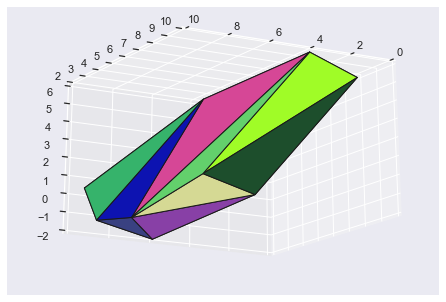

In [124]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(f3,axis=0)
max_=np.max(f3,axis=0)
ax = a3.Axes3D(pl.figure())
for s in hull.simplices:
    p2 = f3[s]
    tri = a3.art3d.Poly3DCollection([p2])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=-20, azim=60)
pl.show()

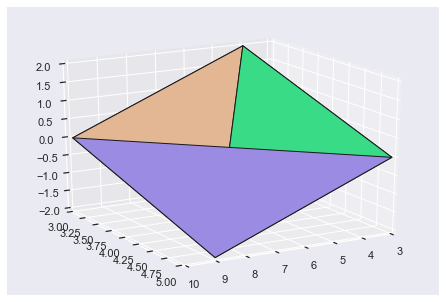

In [125]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(g3,axis=0)
max_=np.max(g3,axis=0)
ax = a3.Axes3D(pl.figure())

p2 = g3[np.array([0,1,2])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([1,2,3])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([2,3,0])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([3,0,1])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=20, azim=60)
pl.show()